# ZigZagをプロットする

使用ライブラリ：[https://github.com/jbn/ZigZag](https://github.com/jbn/ZigZag)

In [1]:
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.dates import DateFormatter
from zigzag import peak_valley_pivots

# TORM plc (TRMD)
trmd = pd.read_csv("TRMD.csv", index_col="Date")
trmd.index = pd.to_datetime(trmd.index)
trmd.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-17,32.080002,32.669998,31.760000,32.060001,25.389601,206600
2023-02-21,32.490002,33.250000,31.840000,32.119999,25.437117,240900
2023-02-22,32.709999,32.759998,31.110001,31.450001,24.906519,340400
2023-02-23,33.380001,34.639999,33.330002,34.299999,27.163548,496600
2023-02-24,34.889999,34.965000,34.290001,34.689999,27.472404,338000


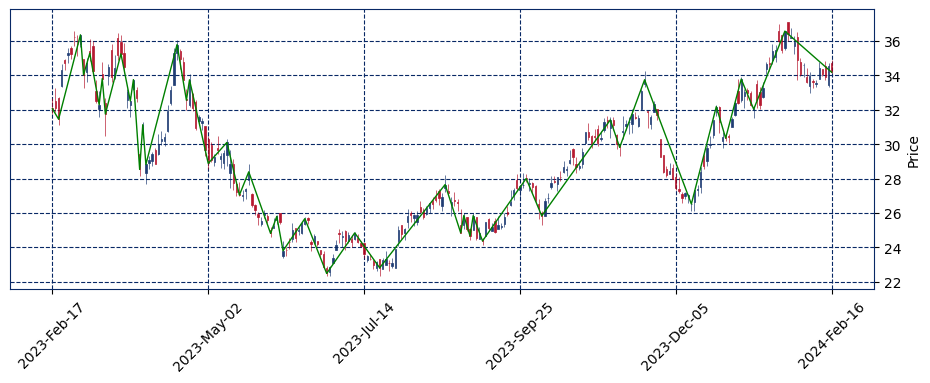

In [2]:
def plot_zigzag(ax, X, p):
    """zigzagをプロット
    args:
        ax: axis
        X: pandas.Series
        p: pivots index
    """
    ax.plot(np.arange(len(X))[p != 0], X[p != 0], "g-", linewidth=1)
    return ax


fig, axes = mpf.plot(
    trmd, type="candle", style="starsandstripes", figsize=(12, 4), returnfig=True
)

pivots = peak_valley_pivots(trmd["Close"], 0.03, -0.03)
axes[0] = plot_zigzag(axes[0], trmd["Close"], pivots)